<a href="https://colab.research.google.com/github/geez5/CustomersegmentationClustering/blob/main/customer_clustering_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing dependencies


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

Data collection and analysis


In [ ]:
# loading the data from csv files to a pandas dataframe
customer_data = pd.read_csv('/content/data.csv.zip', encoding='latin1') # or 'ISO-8859-1'

In [ ]:
# first 5 rows of the dataframe
customer_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
#finding the number of rows and columns
customer_data.shape

(541909, 8)

In [ ]:
# getting some information about the dataset
customer_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
#checking for missing values
customer_data.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [ ]:
# cleaning the data
df = pd.DataFrame(customer_data)
df_cleaned = df.dropna()

In [ ]:
# check if the data  is cleaned
# Returns False if there are no null values left (i.e., the data is clean).
# Returns True if there are still some nulls.
print(df_cleaned.isnull().values.any())


False


choosing the quantity and unitprice


In [ ]:
X = customer_data[['Quantity', 'UnitPrice']].values

In [ ]:
print(X)

[[6.   2.55]
 [6.   3.39]
 [8.   2.75]
 ...
 [4.   4.15]
 [4.   4.15]
 [3.   4.95]]


In [ ]:
X_unique = np.unique(X, axis=0)
print(len(X_unique))  # Should print 8394



8394


In [ ]:
# Double check no duplicates in X_unique
print(pd.DataFrame(X_unique).duplicated().sum())  # Should print 0

0


In [ ]:
# to overwrite x with the cleaned version
X = np.unique(X, axis=0)


In [ ]:
# to find out the number of unique rows with no duplicates
print(len(X))  # Should be 8394 now


8394


In [ ]:
# to check if there are any duplicates left
print(len(X), len(np.unique(X, axis=0)))

8394 8394


Choosing the Number of Clusters

wCSS -> within cluster sum of squares

In [ ]:
#finding wcss value for different number of clusters

wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

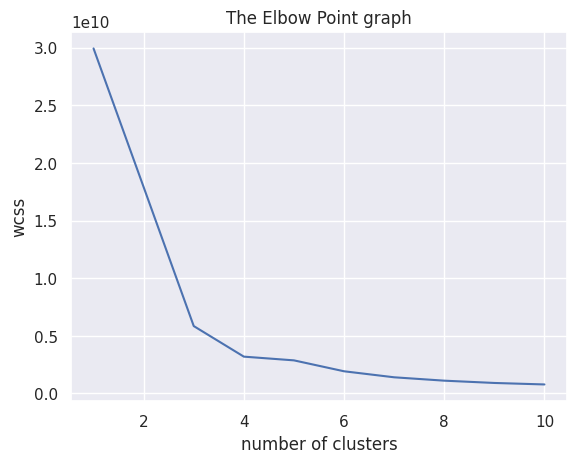

In [ ]:
# plot an elbow graph
sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point graph')
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.show()

Here, Optimum Number of Clusters = 4

Training the k-Means Clustering Model

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Y = kmeans.fit_predict(X_scaled)



In [34]:
kmeans = KMeans (n_clusters=4, init='k-means++', random_state=0)

# return a label for each data point based on thier cluster
Y = kmeans.fit_predict(X)

# Set print options to display the full array
np.set_printoptions(threshold=np.inf)

print(Y)


[2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

Visualizing all the clusters (kmeans)

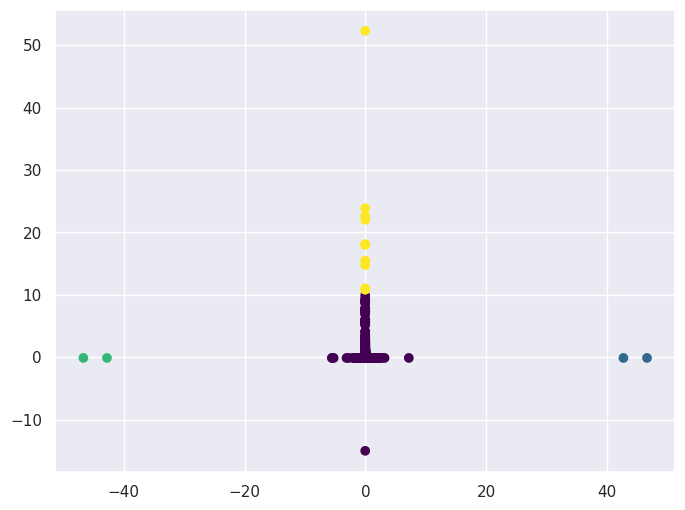

In [36]:
# plotting all the clusters and thier centroids

plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=Y, cmap='viridis')

Text(0.5, 0, 'Annual Income (k$)')

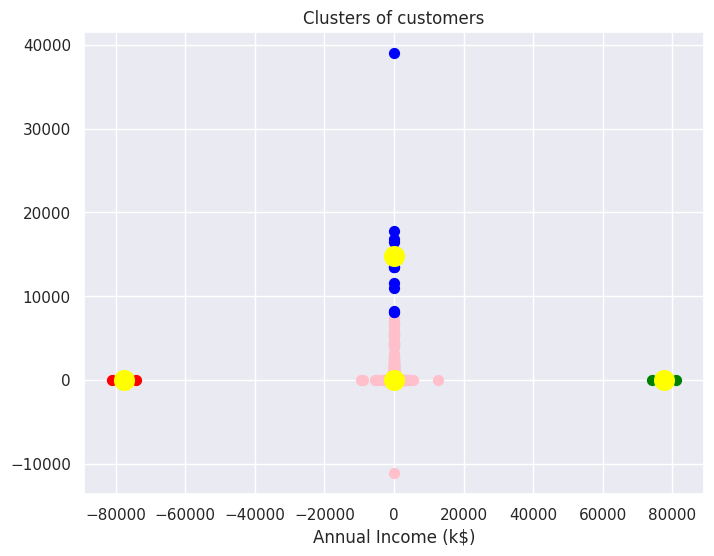

In [41]:
# plotting all the clusters and thier centroids

plt.figure(figsize=(8, 6))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='pink', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='green', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='red', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='blue', label='Cluster 4')

#plot the centroid
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='yellow', label='Centroids')

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')



Since the data has low variance therefore, almost all points are in cluster 0, and only a few in clusters 1, 2, 3 (one dominant cluster)

clustering through DBSCAN- Density-Based Spatial Clustering of Applications with Noise

In [ ]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=4)
Y = agg.fit_predict(X_scaled)


Does not require you to pick k

Can detect noise/outliers

Will assign -1 to outliers

Visualize the clusters (DBSCAN)

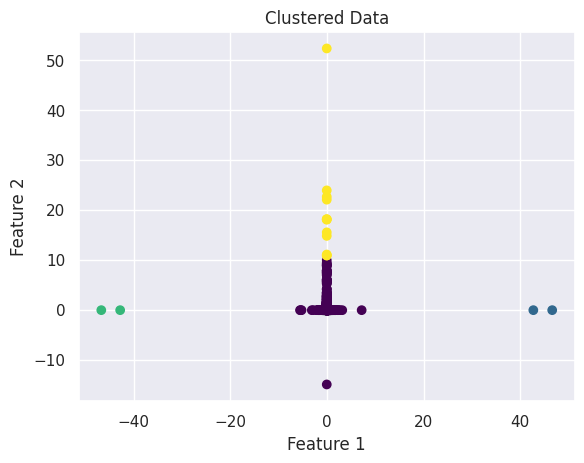

In [47]:
import matplotlib.pyplot as plt

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=Y, cmap='viridis')
plt.title('Clustered Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()



 Hierarchical Clustering (Agglomerative)

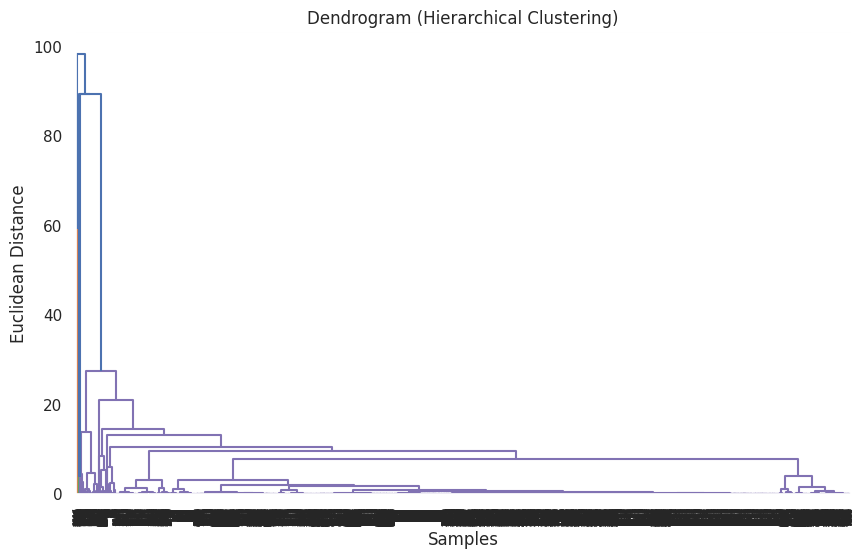

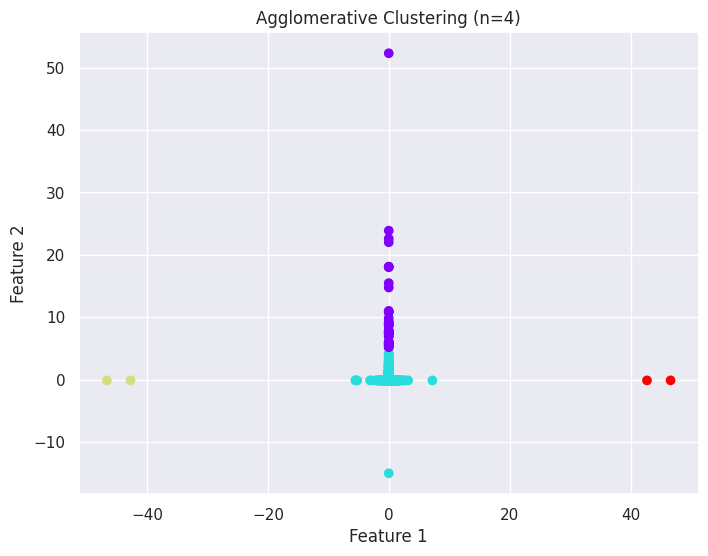

   Feature1  Feature2  Cluster
0  -80995.0      2.08        2
1  -74215.0      1.04        2
2   -9600.0      0.00        1
3   -9360.0      0.03        1
4   -9058.0      0.00        1


In [50]:
from scipy.cluster.hierarchy import dendrogram, linkage


# Assuming your cleaned unique data is in variable X
# Step 1: Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Plot dendrogram to visualize optimal number of clusters
linked = linkage(X_scaled, method='ward')

plt.figure(figsize=(10, 6))
dendrogram(linked)
plt.title("Dendrogram (Hierarchical Clustering)")
plt.xlabel("Samples")
plt.ylabel("Euclidean Distance")
plt.show()

# Step 3: Apply Agglomerative Clustering
# Step 3: Apply Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=4, linkage='ward') # Remove affinity='euclidean'
Y = agg.fit_predict(X_scaled)

# Step 4: Visualize the clusters (only if 2D or using first two features)
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=Y, cmap='rainbow')
plt.title("Agglomerative Clustering (n=4)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Optional: Add cluster labels to a DataFrame
df_clusters = pd.DataFrame(X, columns=["Feature1", "Feature2"])  # rename based on your actual features
df_clusters["Cluster"] = Y

print(df_clusters.head())
